In [2]:
from torchvision import datasets, transforms
from torch.utils import data

In [9]:
train_loader = data.DataLoader(
    datasets.FashionMNIST('dataset/', train=True, download=True,
                         transform=transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize(mean=(0.5,), std=(0.5,))
                         ])
                         ),
    batch_size=32
)
                          


In [10]:
test_loader = data.DataLoader(
    datasets.FashionMNIST('dataset/', train=False, download=True,
                         transform=transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize(mean=(0.5,), std=(0.5,))
                         ])
                         ),
    batch_size=32
)
                

In [12]:
len(train_loader), len(test_loader) #배치사이즈 32여서 각 길이에 * 32 해주면 됨
# 대충 6만개 1만개해서 7만개 -> 잘 했음

(1875, 313)

In [16]:
images, labels = next(iter(train_loader))
images.shape #4개의 값 , batch_size, channel, height, width -> 넓이

torch.Size([32, 1, 28, 28])

In [17]:
labels.shape

torch.Size([32])

In [18]:
images[0].shape

torch.Size([1, 28, 28])

In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
import torch
torch_image = torch.squeeze(images[0]) #1을 제거 후 28,28 로 시각화를 해보기 위해 squeeze()함수 사용
torch_image.shape

torch.Size([28, 28])

In [22]:
torch_image.numpy()

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

In [27]:
import os # kernel error 발생 시 추가
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

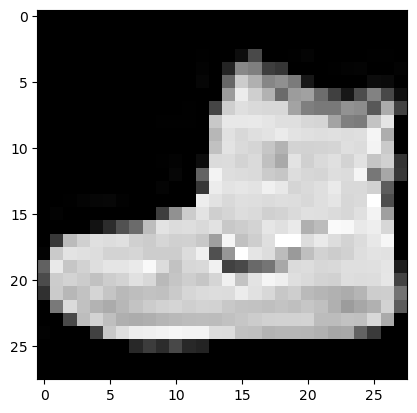

In [28]:
plt.imshow(torch_image.numpy(), 'gray')
plt.show()

In [29]:
labels[0]

tensor(9)